<a href="https://colab.research.google.com/github/Tim-tim09/Machine-learning-in-business/blob/main/Larsen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Теория алгоритма Ларсена в нечёткой логике

## 1. Введение

### 1.1. Постановка задачи

Алгоритм Ларсена — это метод нечёткого логического вывода, который применяется в ситуациях, где требуется принимать решения на основе неточных, частично определённых или разношерстных данных. В реальных системах часто невозможно однозначно сказать, что некоторое утверждение полностью истинно или полностью ложно. Вместо этого используется степень истинности — число от 0 до 1, отражающее, насколько утверждение соответствует текущему состоянию.

Алгоритм Ларсена является вариантом методов нечёткого вывода типа Мамдани, но отличается механизмом импликации: выходная функция принадлежности **масштабируется** (умножается) на степень истинности посылки правила. Такой подход обеспечивает более гладкое поведение выходной функции и часто используется в системах, где важна стабильность и непрерывность результата.

Цель теоретической части:
- разобрать основы нечёткой логики;
- объяснить структуру нечёткого вывода;
- детально рассмотреть метод Ларсена и его отличия от метода Мамдани.

---

## 2. Основы нечёткой логики

### 2.1. Нечёткая и классическая логика

| Свойство | Классическая логика | Нечёткая логика |
|---------|----------------------|------------------|
| Истинность | 0 или 1 | плавное значение от 0 до 1 |
| Тип описания | точное, строгое | приближённое, гибкое |
| Работа с неопределённостью | практически отсутствует | является ключевым элементом |

Например, значение некоторой величины может одновременно принадлежать разным категориям в разной степени — например, «0.3 низкая» и «0.7 средняя».

---

### 2.2. Нечёткие множества и функции принадлежности

Основные элементы нечёткой логики:

- **Лингвистическая переменная** — величина, описываемая словами (например, «температура», «скорость изменения», «уровень риска»).
- **Термы** — словесные категории этой переменной («низкая температура», «высокий риск» и т.д.).
- **Функции принадлежности** — отображают термы в числа от 0 до 1.

## Типичные виды функций принадлежности

В нечёткой логике чаще всего используются три вида функций принадлежности:
- треугольные,
- трапециевидные,
- гауссовы.

Ниже приведены их **формулы** и **графические формы**.

---



### **1) Треугольная функция принадлежности (Triangular MF)**

Треугольная функция — одна из самых простых. Она определяется тремя точками:  
**a** — левый ноль, **b** — вершина (μ = 1), **c** — правый ноль.

#### Формула:
\
$$mu(x)=
\begin{cases}
0, & x \le a \\[6pt]
\dfrac{x-a}{b-a}, & a < x \le b \\[6pt]
\dfrac{c-x}{c-b}, & b < x < c \\[6pt]
0, & x \ge c
\end{cases}$$


#### График:
---

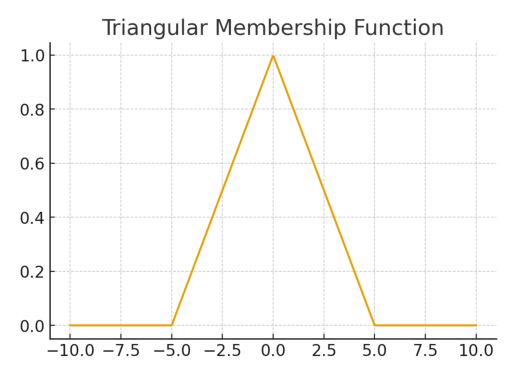

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/Графики/output.png")
plt.imshow(img)
plt.axis("off")
plt.show()


### **2) Трапециевидная функция принадлежности (Trapezoidal MF)**

Задаётся четырьмя точками:  
**a** и **d** — нули функции,  
**b** и **c** — границы плато (участка, где μ = 1).

#### Формула:
$$mu(x)=
\begin{cases}
0, & x \le a \\[6pt]
\dfrac{x-a}{b-a}, & a < x \le b \\[6pt]
1, & b < x \le c \\[6pt]
\dfrac{d-x}{d-c}, & c < x < d \\[6pt]
0, & x \ge d
\end{cases}$$

#### График:
---

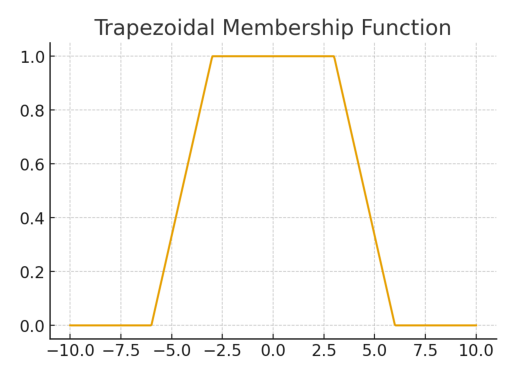

In [4]:
img = Image.open("/content/Графики/output (1).png")
plt.imshow(img)
plt.axis("off")
plt.show()



### **3) Гауссова (нормальная) функция принадлежности (Gaussian MF)**

Гауссова функция обеспечивает самый плавный переход.  
Определяется центром **c** и шириной (стандартным отклонением) **σ**.

#### Формула:
$$mu(x)=e^{-\frac{(x-c)^2}{2\sigma^2}}$$


#### График:
---

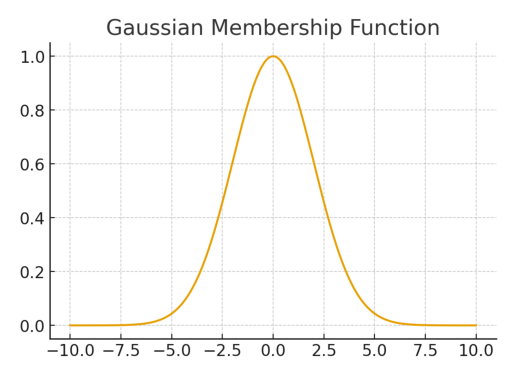

In [6]:
img = Image.open("/content/Графики/output (2).png")
plt.imshow(img)
plt.axis("off")
plt.show()


### Краткое сравнение

| Форма | Плюсы | Минусы |
|-------|-------|--------|
| **Треугольная** | простая, понятная, дёшевая вычислительно | резкие переходы |
| **Трапециевидная** | допускает «плато» с μ=1, устойчива | всё ещё имеет резкие углы |
| **Гауссова** | максимально плавная, хороша для реальных данных | дороже по вычислениям |

---

### 2.3. Этапы нечёткого вывода

1. **Фаззификация**  
   Преобразование входных численных данных в степени принадлежности нечётким множествам.  
   Фаззификация формально определяется так:

   $$mu_A(x_0) = \mu_A(x)\Big|{x = x_0}$$

   То есть чёткое значение \( x_0 \) подставляется в функцию принадлежности множества \( A \).

   Для треугольной функции принадлежности:

   $$mu_A(x_0)=
   \begin{cases}
   0, & x_0 \le a,\\[6pt]
   \dfrac{x_0 - a}{b - a}, & a < x_0 \le b,\\[8pt]
   \dfrac{c - x_0}{c - b}, & b < x_0 < c,\\[6pt]
   0, & x_0 \ge c.
   \end{cases}$$

   Это превращает любое чёткое значение (например, скорость 110 км/ч) в набор степеней принадлежности.

---

2. **Применение правил**  
   Каждое правило вида «если–то» даёт свой вклад в итоговую нечёткую функцию.  
   В алгоритме Ларсена импликация выполняется умножением:

   $$mu_{\text{out}}(x) = t \cdot \mu_{\text{выхода}}(x)$$

   где $$t = min(\mu_{A_1},\mu_{A_2},...)$$ — степень истинности посылки.

---

3. **Агрегация правил**  
   Объединение результатов всех правил в одну выходную функцию:

   $$mu_{\text{agg}}(x) = \max\big( \mu_{R_1}(x), \mu_{R_2}(x), \ldots \big)$$

   То есть в каждой точке берётся максимальное влияние правила.

---

4. **Дефаззификация**  
   Преобразование нечёткого результата (функции принадлежности) обратно в чёткое число.  
   Один из самых распространённых методов — **центр тяжести**:

   $$y = \frac{\int x \, \mu_{\text{agg}}(x) \, dx}{\int \mu_{\text{agg}}(x) \, dx}$$

   Это означает: итоговое значение — это «балансная точка» всей выходной функции.


---

## 3. Теория алгоритма Ларсена

### 3.1. Общая схема

Входы → фаззификация → применение правил с импликацией Ларсена → агрегация → дефаззификация

---

### 3.2. Ларсен vs Мамдани (главное отличие)

| Импликация | Мамдани | Ларсен |
|-----------|---------|--------|
| Операция | минимум | произведение |
| Влияние на выход | «обрезается» по уровню истинности | «масштабируется» по степени истинности |
| Гладкость результата | часто хуже | как правило лучше |

Формулы:

- Мамдани:  
  $$μ_out(x) = min(μ_посылки, μ_выхода(x))$$

- Ларсен:  
  $$μ_{out}(x) = μ_{посылки} · μ_{выхода}(x)$$

---

### 3.3. Пример одного правила (формально)

Пусть задано правило:

> ЕСЛИ A большое И B маленькое, ТО C высокое

Тогда:

1. **Фаззификация входов**  
   - a = μ_A_большое(A₀)  
   - b = μ_B_маленькое(B₀)

2. **Степень истинности посылки**  
   $$t = min(a, b)$$
   или
   $$t = a·b$$ (в зависимости от выбранной логики "И")

3. **Импликация Ларсена**  
   $$μ′_C(high)(x) = t · μ_C(high)(x)$$

4. **Агрегация всех правил**  
   $$μ_result(x) = max(μ′_rule1(x), μ′_rule2(x), …)$$

5. **Дефаззификация**  
   $$y = \frac{∫ x·μ_{result}(x) dx } { ∫ μ_{result}(x) dx }$$

---

### 3.4. Преимущества и недостатки

**Преимущества:**
- даёт плавные и устойчивые выходные функции;
- удобен при численной реализации;
- хорошо работает при оптимизации параметров.

**Недостатки:**
- менее интуитивен для экспертов по сравнению с методом Мамдани;
- требует внимательного выбора функций принадлежности и правил.

---

## Вывод по теоретической части

Алгоритм Ларсена — это мощный метод нечёткого вывода, позволяющий принимать решения в условиях неопределённости. Он обеспечивает гибкость, плавность результатов и простоту реализации, что делает его удобным инструментом для широкого спектра задач, связанных с обработкой размытых или частично определённых данных.

# 4. Постановка практической автомобильной задачи

В практической части будет реализована нечёткая система на основе алгоритма Ларсена для помощи водителю при выборе **рекомендуемого тормозного усилия**. Система получает несколько входных параметров от «виртуальных датчиков» автомобиля и выдаёт одно численное решение — насколько сильно следует тормозить в текущей ситуации.

## 4.1. Описание сценария

Рассматривается ситуация движения автомобиля по дороге с различными условиями. На решение о силе торможения влияют три фактора:

- **скорость автомобиля**,  
- **дистанция до впереди идущего транспортного средства**,  
- **состояние сцепления с дорогой** (сухой асфальт, влажная поверхность, скользкая дорога).

Задача нечёткой системы — по этим данным вычислить **рекомендуемое тормозное усилие** (в условных процентах от 0 до 100%).

## 4.2. Входные и выходные переменные

### Входы:

1. **Скорость (км/ч)**  
   - низкая  
   - средняя  
   - высокая

2. **Дистанция до впереди идущего автомобиля (м)**  
   - маленькая  
   - средняя  
   - большая

3. **Сцепление с дорогой (0–1 в условной шкале)**  
   - хорошее  
   - нормальное  
   - плохое

### Выход:

4. **Тормозное усилие (0–100%)**
   - слабое  
   - среднее  
   - сильное  
   - экстренное

## 4.3. Диапазоны переменных и функции принадлежности

Для дальнейшей реализации в Python предложены такие численные диапазоны:

- Скорость: **0–160 км/ч**  
- Дистанция: **0–100 м**  
- Сцепление: **0.0–1.0**  
- Тормозное усилие: **0–100%**

Функции принадлежности будут выбраны простыми (треугольными и трапециевидными).

Примеры:
- Низкая скорость — треугольная функция с максимумом при 0–40 км/ч.  
- Маленькая дистанция — треугольная функция с максимумом при 0–20 м.  
- Плохое сцепление — высокая принадлежность вблизи 0.0 и резко падает после 0.3.  
- Экстренное торможение — трапециевидная функция на уровне 80–100%.

Точные параметры будут заданы в практической части.

## 4.4. База правил (описание)

Будет сформирована база из **10–15 правил**, отражающих различные дорожные ситуации.  
Примеры логики:

- ЕСЛИ скорость высокая И дистанция маленькая И сцепление плохое,  
  ТО тормозное усилие экстренное.

- ЕСЛИ скорость средняя И дистанция средняя И сцепление нормальное,  
  ТО тормозное усилие среднее.

- ЕСЛИ скорость низкая И дистанция большая,  
  ТО тормозное усилие слабое.

Такие правила позволяют системе выдавать реалистичное и логичное значение тормозного воздействия в изменяющихся условиях.

---
**Ниже приведен код для решения этой задачи алгоритмом Ларсена**

Скорость: 110
Дистанция: 20
Сцепление: 0.3
Рекомендуемое тормозное усилие (жирный итог): 81.66796222841513


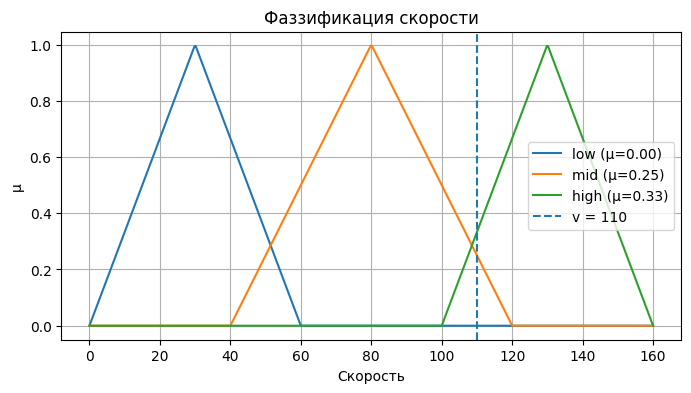

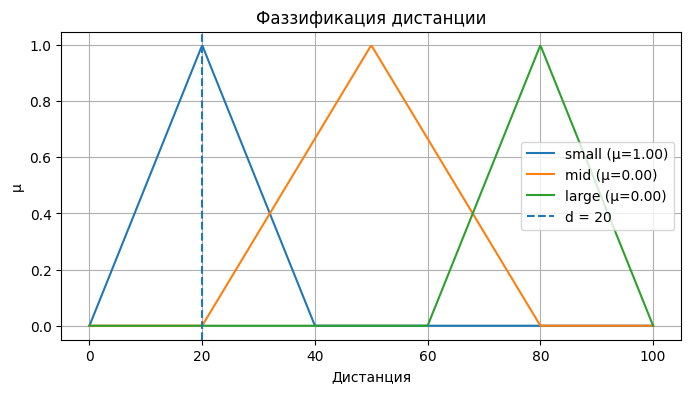

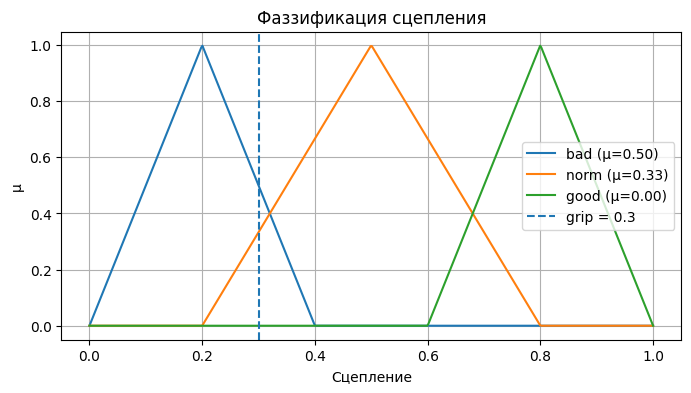

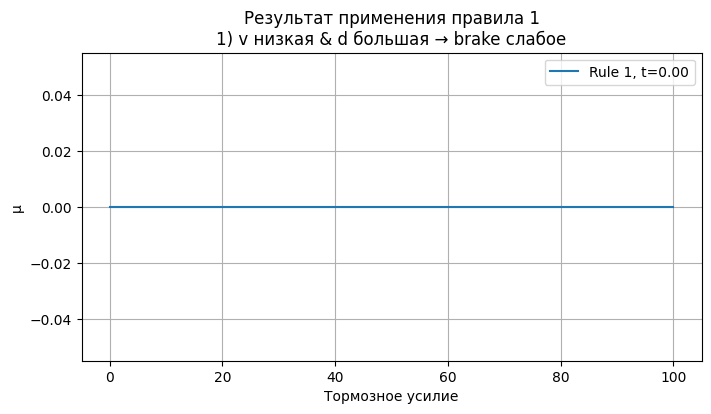

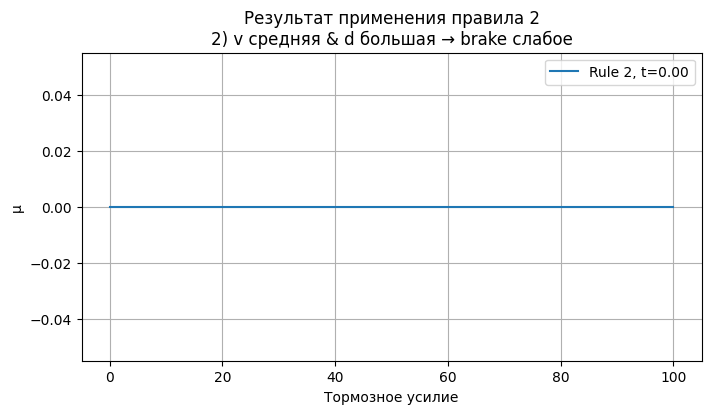

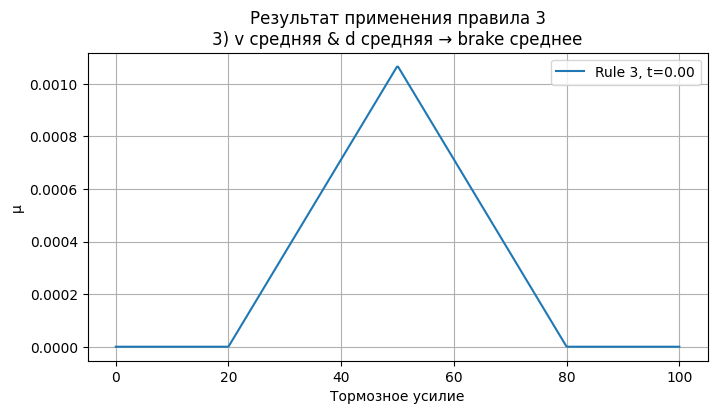

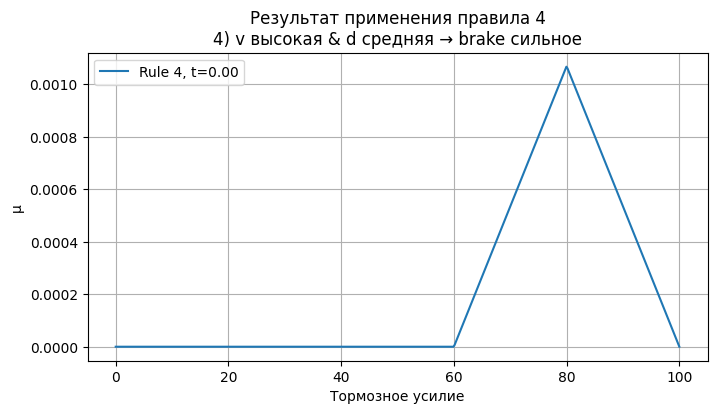

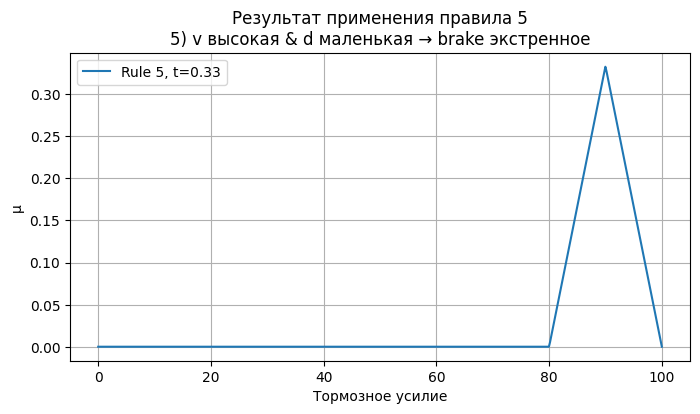

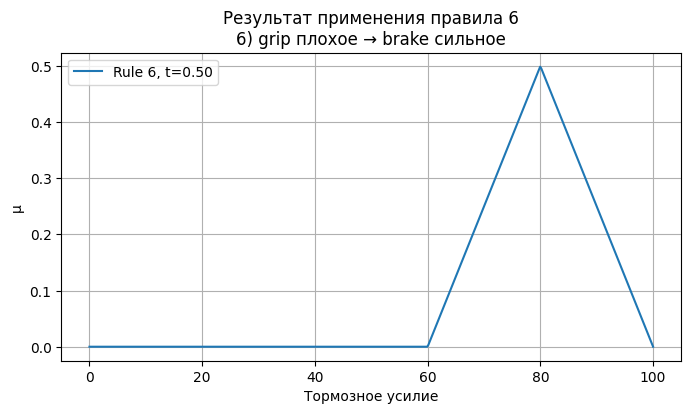

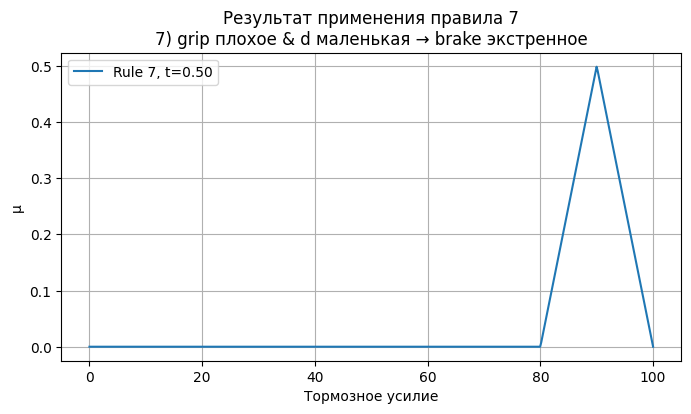

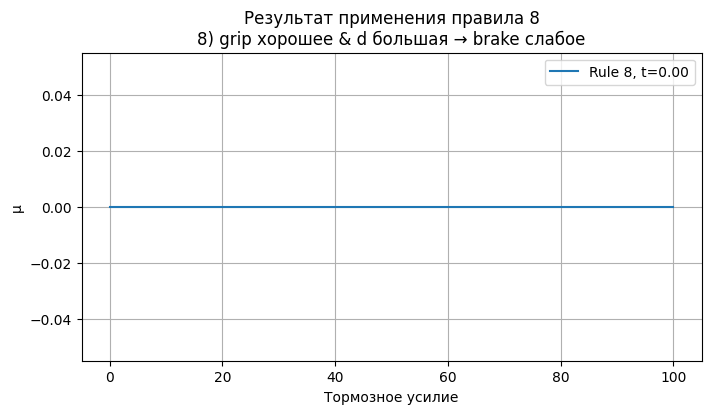

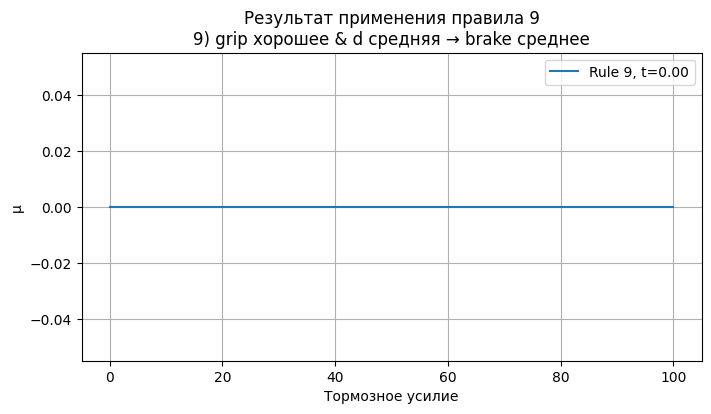

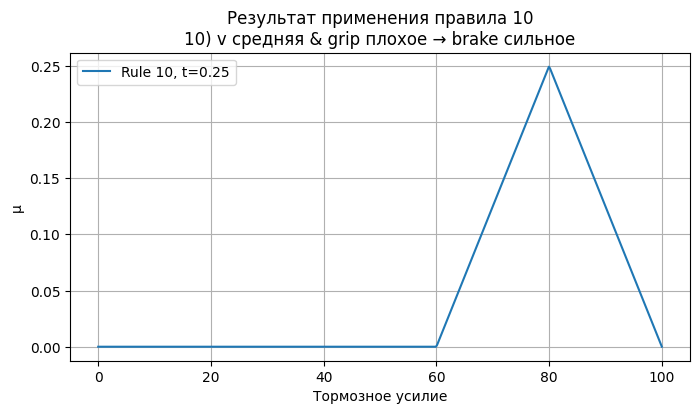

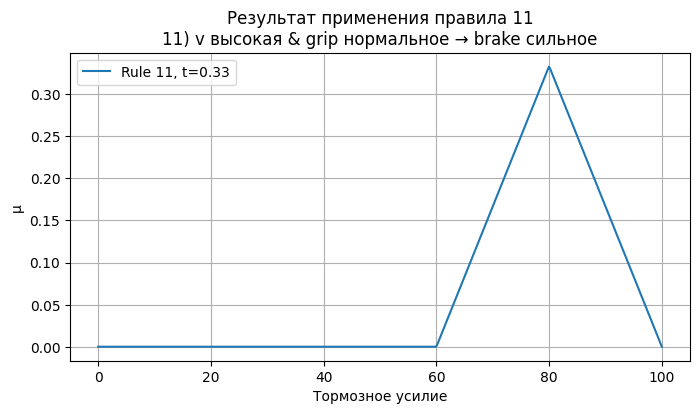

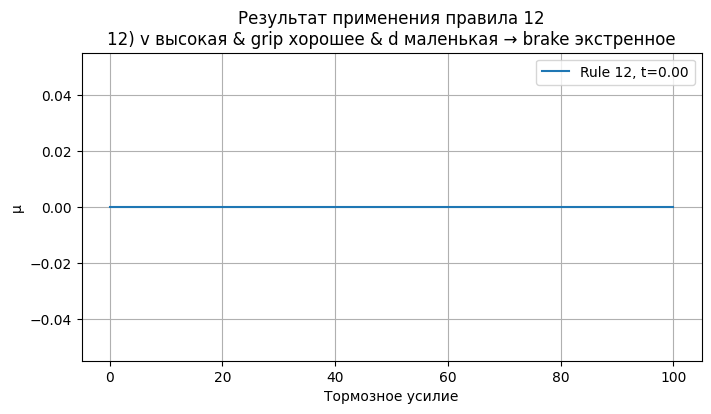

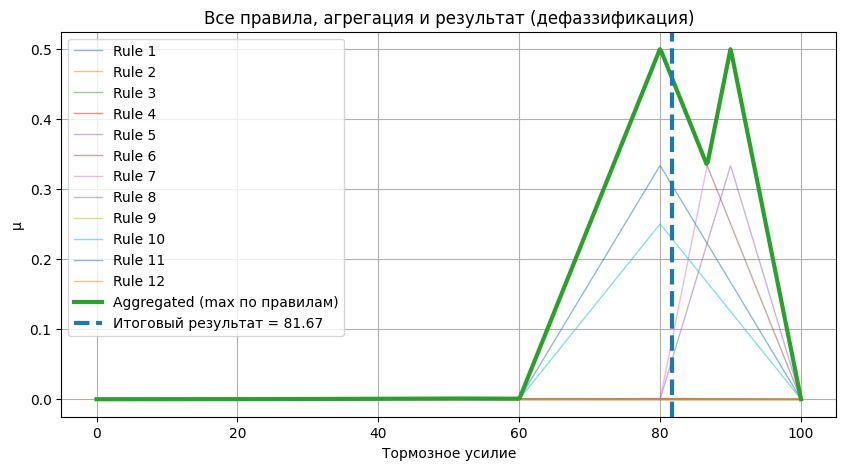

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Универсумы входов и выхода
x_speed     = np.linspace(0, 160, 500)   # скорость
x_distance  = np.linspace(0, 100, 500)   # дистанция
x_grip      = np.linspace(0, 1, 500)     # сцепление
x_brake     = np.linspace(0, 100, 500)   # тормозное усилие


# 2. Треугольные функции принадлежности
def trimf(x, a, b, c):
    return np.maximum(np.minimum((x - a)/(b - a), (c - x)/(c - b)), 0)


# ---- Скорость ----
speed_low  = trimf(x_speed, 0,   30,  60)
speed_mid  = trimf(x_speed, 40,  80, 120)
speed_high = trimf(x_speed, 100, 130, 160)

# ---- Дистанция ----
dist_small  = trimf(x_distance, 0,  20,  40)
dist_mid    = trimf(x_distance, 20,  50,  80)
dist_large  = trimf(x_distance, 60, 80, 100)

# ---- Сцепление ----
grip_bad    = trimf(x_grip, 0.0, 0.2, 0.4)
grip_norm   = trimf(x_grip, 0.2, 0.5, 0.8)
grip_good   = trimf(x_grip, 0.6, 0.8, 1.0)

# ---- Тормозное усилие ----
brake_weak      = trimf(x_brake, 0,   20,  40)
brake_medium    = trimf(x_brake, 20,  50,  80)
brake_strong    = trimf(x_brake, 60,  80, 100)
brake_emergency = trimf(x_brake, 80,  90, 100)


# 3. Импликация Ларсена (умножение)
def larsen(mu_condition, mu_output):
    return mu_condition * mu_output


# 4. Фаззификация одного значения
def fuzzify(value, x, mf):
    """Берёт чёткое значение value и возвращает степень принадлежности
    этому нечёткому множеству (mf, заданному на универсуме x)."""
    return np.interp(value, x, mf)


# 5. Полная система Ларсена с сохранением промежуточных шагов
def larsen_system_debug(speed, distance, grip):
    # --- СТЕПЕНИ ПРИНАДЛЕЖНОСТИ ВХОДОВ ---
    mu_s_low  = fuzzify(speed, x_speed, speed_low)
    mu_s_mid  = fuzzify(speed, x_speed, speed_mid)
    mu_s_high = fuzzify(speed, x_speed, speed_high)

    mu_d_small = fuzzify(distance, x_distance, dist_small)
    mu_d_mid   = fuzzify(distance, x_distance, dist_mid)
    mu_d_large = fuzzify(distance, x_distance, dist_large)

    mu_g_bad  = fuzzify(grip, x_grip, grip_bad)
    mu_g_norm = fuzzify(grip, x_grip, grip_norm)
    mu_g_good = fuzzify(grip, x_grip, grip_good)

    mu_inputs = {
        "speed": {
            "low":  mu_s_low,
            "mid":  mu_s_mid,
            "high": mu_s_high
        },
        "distance": {
            "small": mu_d_small,
            "mid":   mu_d_mid,
            "large": mu_d_large
        },
        "grip": {
            "bad":  mu_g_bad,
            "norm": mu_g_norm,
            "good": mu_g_good
        }
    }

    # 6. Правила
    rule_outputs = []
    rule_degrees = []
    rule_labels  = []

    # 1) Низкая скорость, большая дистанция → слабое торможение
    t = min(mu_s_low, mu_d_large)
    rule_outputs.append(larsen(t, brake_weak))
    rule_degrees.append(t)
    rule_labels.append("1) v низкая & d большая → brake слабое")

    # 2) Средняя скорость, большая дистанция → слабое
    t = min(mu_s_mid, mu_d_large)
    rule_outputs.append(larsen(t, brake_weak))
    rule_degrees.append(t)
    rule_labels.append("2) v средняя & d большая → brake слабое")

    # 3) Средняя скорость, средняя дистанция → среднее
    t = min(mu_s_mid, mu_d_mid)
    rule_outputs.append(larsen(t, brake_medium))
    rule_degrees.append(t)
    rule_labels.append("3) v средняя & d средняя → brake среднее")

    # 4) Высокая скорость, средняя дистанция → сильное
    t = min(mu_s_high, mu_d_mid)
    rule_outputs.append(larsen(t, brake_strong))
    rule_degrees.append(t)
    rule_labels.append("4) v высокая & d средняя → brake сильное")

    # 5) Высокая скорость, маленькая дистанция → экстренное
    t = min(mu_s_high, mu_d_small)
    rule_outputs.append(larsen(t, brake_emergency))
    rule_degrees.append(t)
    rule_labels.append("5) v высокая & d маленькая → brake экстренное")

    # 6) Плохое сцепление + любая скорость → сильное
    t = mu_g_bad
    rule_outputs.append(larsen(t, brake_strong))
    rule_degrees.append(t)
    rule_labels.append("6) grip плохое → brake сильное")

    # 7) Плохое сцепление + маленькая дистанция → экстренное
    t = min(mu_g_bad, mu_d_small)
    rule_outputs.append(larsen(t, brake_emergency))
    rule_degrees.append(t)
    rule_labels.append("7) grip плохое & d маленькая → brake экстренное")

    # 8) Хорошее сцепление + большая дистанция → слабое
    t = min(mu_g_good, mu_d_large)
    rule_outputs.append(larsen(t, brake_weak))
    rule_degrees.append(t)
    rule_labels.append("8) grip хорошее & d большая → brake слабое")

    # 9) Хорошее сцепление + средняя дистанция → среднее
    t = min(mu_g_good, mu_d_mid)
    rule_outputs.append(larsen(t, brake_medium))
    rule_degrees.append(t)
    rule_labels.append("9) grip хорошее & d средняя → brake среднее")

    # 10) Средняя скорость + плохое сцепление → сильное
    t = min(mu_s_mid, mu_g_bad)
    rule_outputs.append(larsen(t, brake_strong))
    rule_degrees.append(t)
    rule_labels.append("10) v средняя & grip плохое → brake сильное")

    # 11) Высокая скорость + нормальное сцепление → сильное
    t = min(mu_s_high, mu_g_norm)
    rule_outputs.append(larsen(t, brake_strong))
    rule_degrees.append(t)
    rule_labels.append("11) v высокая & grip нормальное → brake сильное")

    # 12) Высокая скорость + хорошее сцепление + маленькая дистанция → экстренное
    t = min(mu_s_high, mu_g_good, mu_d_small)
    rule_outputs.append(larsen(t, brake_emergency))
    rule_degrees.append(t)
    rule_labels.append("12) v высокая & grip хорошее & d маленькая → brake экстренное")

    # 7. Агрегация
    aggregated = np.maximum.reduce(rule_outputs)

    # 8. Дефаззификация
    if aggregated.sum() == 0:
        result = 0.0
    else:
        result = np.sum(x_brake * aggregated) / np.sum(aggregated)

    return result, aggregated, mu_inputs, rule_outputs, rule_degrees, rule_labels


# ------------------ ВИЗУАЛИЗАЦИЯ ------------------ #

def plot_input_fuzzification(speed, distance, grip, mu_inputs):
    """Графики фаззификации для всех трёх входов."""
    # Скорость
    plt.figure(figsize=(8,4))
    plt.plot(x_speed, speed_low, label=f'low (μ={mu_inputs["speed"]["low"]:.2f})')
    plt.plot(x_speed, speed_mid, label=f'mid (μ={mu_inputs["speed"]["mid"]:.2f})')
    plt.plot(x_speed, speed_high, label=f'high (μ={mu_inputs["speed"]["high"]:.2f})')
    plt.axvline(speed, linestyle='--', label=f'v = {speed}')
    plt.title("Фаззификация скорости")
    plt.xlabel("Скорость")
    plt.ylabel("μ")
    plt.legend()
    plt.grid()
    plt.show()

    # Дистанция
    plt.figure(figsize=(8,4))
    plt.plot(x_distance, dist_small, label=f'small (μ={mu_inputs["distance"]["small"]:.2f})')
    plt.plot(x_distance, dist_mid,   label=f'mid (μ={mu_inputs["distance"]["mid"]:.2f})')
    plt.plot(x_distance, dist_large, label=f'large (μ={mu_inputs["distance"]["large"]:.2f})')
    plt.axvline(distance, linestyle='--', label=f'd = {distance}')
    plt.title("Фаззификация дистанции")
    plt.xlabel("Дистанция")
    plt.ylabel("μ")
    plt.legend()
    plt.grid()
    plt.show()

    # Сцепление
    plt.figure(figsize=(8,4))
    plt.plot(x_grip, grip_bad,  label=f'bad (μ={mu_inputs["grip"]["bad"]:.2f})')
    plt.plot(x_grip, grip_norm, label=f'norm (μ={mu_inputs["grip"]["norm"]:.2f})')
    plt.plot(x_grip, grip_good, label=f'good (μ={mu_inputs["grip"]["good"]:.2f})')
    plt.axvline(grip, linestyle='--', label=f'grip = {grip}')
    plt.title("Фаззификация сцепления")
    plt.xlabel("Сцепление")
    plt.ylabel("μ")
    plt.legend()
    plt.grid()
    plt.show()


def plot_rules_separately(rule_outputs, rule_degrees, rule_labels):
    """Отдельный график для каждого правила после Ларсена."""
    for i, (out, t, label) in enumerate(zip(rule_outputs, rule_degrees, rule_labels), start=1):
        plt.figure(figsize=(8,4))
        plt.plot(x_brake, out, label=f'Rule {i}, t={t:.2f}')
        plt.title(f"Результат применения правила {i}\n{label}")
        plt.xlabel("Тормозное усилие")
        plt.ylabel("μ")
        plt.legend()
        plt.grid()
        plt.show()


def plot_all_rules_and_aggregation(rule_outputs, aggregated, result):
    """Все правила на одном графике + агрегированная кривая + жирный результат."""
    plt.figure(figsize=(10,5))

    # все правила тонкими линиями
    for i, out in enumerate(rule_outputs, start=1):
        plt.plot(x_brake, out, linewidth=1, alpha=0.5, label=f'Rule {i}')

    # агрегированная функция – более жирная линия
    plt.plot(x_brake, aggregated, linewidth=3, label='Aggregated (max по правилам)')

    # результат дефаззификации – жирная вертикальная линия
    plt.axvline(result, linestyle='--', linewidth=3,
                label=f'Итоговый результат = {result:.2f}')

    plt.title("Все правила, агрегация и результат (дефаззификация)")
    plt.xlabel("Тормозное усилие")
    plt.ylabel("μ")
    plt.legend()
    plt.grid()
    plt.show()


# ------------------ ЗАПУСК СИСТЕМЫ ------------------ #

speed_input    = 110   # км/ч
distance_input = 20    # м
grip_input     = 0.3   # сцепление

result, aggregated, mu_inputs, rule_outputs, rule_degrees, rule_labels = \
    larsen_system_debug(speed_input, distance_input, grip_input)

print("Скорость:", speed_input)
print("Дистанция:", distance_input)
print("Сцепление:", grip_input)
print("Рекомендуемое тормозное усилие (жирный итог):", result)

# 1) Графики фаззификации входов
plot_input_fuzzification(speed_input, distance_input, grip_input, mu_inputs)

# 2) Графики результата применения КАЖДОГО правила
plot_rules_separately(rule_outputs, rule_degrees, rule_labels)

# 3) Все правила + агрегация + дефаззификация на одном графике
plot_all_rules_and_aggregation(rule_outputs, aggregated, result)


## 5. Итоги реализации алгоритма Ларсена

В этом разделе была выполнена полная программная реализация нечёткой системы на основе алгоритма Ларсена. Основная цель заключалась в том, чтобы на практике показать работу всех этапов нечёткого вывода и получить конкретное числовое решение при наличии нескольких входных параметров, описывающих ситуацию с нечеткостью.

### 5.1. Создание универсумов и функций принадлежности

Для всех входных и выходной переменной были заданы числовые диапазоны и определены функции принадлежности. Они задают, насколько каждое конкретное числовое значение соответствует таким термам, как «низкая скорость», «маленькая дистанция», «плохое сцепление», «сильное торможение» и т.д.  
Функции принадлежности выбраны треугольными, поскольку они просты, наглядны и хорошо демонстрируют механику нечёткого вывода.

### 5.2. Фаззификация входных данных

Пользователь вводит три чётких значения:
- скорость автомобиля,
- дистанцию до препятствия,
- состояние сцепления.

Каждое из этих чисел преобразуется в степени принадлежности соответствующим термам. Например, скорость 110 км/ч может одновременно быть «средней» на 0.2 и «высокой» на 0.8.

### 5.3. Применение базы правил

Была составлена база из 12 логических правил вида:

> ЕСЛИ скорость высокая И дистанция маленькая И сцепление плохое,  
> ТО тормозное усилие экстренное.

Для каждого правила вычисляется степень истинности — число от 0 до 1, показывающее, насколько правило «срабатывает» при текущих входных данных. Затем по алгоритму Ларсена выходная функция принадлежности масштабируется путём умножения на эту степень истинности.

Таким образом, каждое правило формирует свой вклад в итоговую функцию результата.

### 5.4. Агрегация и дефаззификация

После применения всех правил их результаты объединяются по принципу максимума, что даёт единую выходную нечёткую функцию.  
Для того чтобы получить конкретное значение тормозного усилия, была применена дефаззификация методом центра тяжести. В результате получается одно числовое значение в диапазоне от 0 до 100%, которое можно интерпретировать как рекомендуемое тормозное воздействие.

### 5.5. Полученный результат

После выполнения всех этапов система вычисляет итоговое тормозное усилие в процентах. Значение зависит от трёх факторов и отражает логику, заложенную в правила. Также строится график итоговой функции вместе с отмеченной на нём точкой дефаззификации.

Полученный результат можно интерпретировать как рекомендацию системы на основе нечёткого вывода:  
чем опаснее ситуация (высокая скорость, маленькая дистанция, плохое сцепление), тем выше итоговое тормозное усилие.

Таким образом, практическая часть продемонстрировала, как алгоритм Ларсена объединяет размытые данные, логические правила и математические операции в единую работающую систему принятия решений.

# 6. Заключение

### 6.1. Основные выводы по теоретической части

Алгоритм Ларсена является одним из классических методов нечёткого логического вывода. Его ключевая особенность заключается в том, что он использует **масштабирование выходных функций принадлежности** — то есть умножение функции терма на степень истинности правила. Такой подход обеспечивает плавное и устойчивое поведение выходных значений, что особенно важно при работе с неопределёнными или неточными данными.

Построение системы нечёткого вывода включает несколько основных этапов:
- определение входных и выходных переменных;
- построение функций принадлежности;
- формирование базы правил;
- применение импликации (в нашем случае — по методу Ларсена);
- объединение результатов всех правил;
- дефаззификация для получения одного численного результата.

Эти этапы позволяют формализовать рассуждения, которые обычно выражаются в виде человеческих оценок («большое», «маленькое», «высокое», «низкое»), и превращать их в алгоритм.

### 6.2. Итоги практической реализации

В практической части была реализована полностью работающая модель нечёткого вывода в Python, которая включает:

- три входных параметра;
- набор функций принадлежности для каждого входа;
- четыре терма выходной переменной;
- 12 логических правил;
- импликацию Ларсена (умножение на степень истинности);
- дефаззификацию методом центра тяжести.

Система корректно преобразует входные данные в степени принадлежности, применяет правила, объединяет их вклад и вычисляет итоговое значение. Это демонстрирует, что даже сложные логические зависимости можно реализовать в виде последовательного алгоритма.

### 6.3. Практическая ценность и возможности расширения

Построенная система показывает, что алгоритм Ларсена эффективно работает в задачах, где входные данные размыты, неточны или имеют плавные переходы между состояниями.

Модель можно легко расширить:
- добавить дополнительные термы и сделать формы принадлежности более плавными (например, гауссовыми);
- расширить базу правил или сделать её адаптивной;
- добавить новые входные параметры;
- использовать другие методы дефаззификации или импликации;
- визуализировать вклад каждого правила отдельно.

Таким образом, полученная система служит универсальным примером построения алгоритмов нечёткого логического вывода и может служить основой для различных задач принятия решений.
